# trying to extract features out of the data

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import numpy as np

In [58]:
df = pd.read_csv('EURUSD_15m_BID_01.01.2010-31.12.2016.csv')
df['Time'] = pd.to_datetime(df.Time)
df = df.set_index('Time')
# resample by day
df = df.resample('D', convention='start').mean()
df['date'] = df.index.values

In [59]:
df.head()

,Open,High,Low,Close,Volume,date
Time,,,,,,
2010-01-01,1.433060,1.433316,1.432669,1.433058,7.998688e+08,2010-01-01
2010-01-02,1.433350,1.433350,1.433350,1.433350,0.000000e+00,2010-01-02
2010-01-03,1.433221,1.433288,1.433168,1.433237,3.126667e+07,2010-01-03
2010-01-04,1.436392,1.437289,1.435604,1.436509,8.335354e+08,2010-01-04
2010-01-05,1.440934,1.441628,1.440109,1.440874,8.321573e+08,2010-01-05


# We should have an average of the high and low values

In [60]:
df['Avg'] =(df['Low'] + df['High'])/2

# Using the date as features !
We can imagine that supervised learning algorithms may be able to use these inputs to help tease out time-of-year or time-of-month type seasonality information.

In [61]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df = df.drop('date', axis=1)

In [62]:
df.head()

,Open,High,Low,Close,Volume,Avg,year,month,day
Time,,,,,,,,,
2010-01-01,1.433060,1.433316,1.432669,1.433058,7.998688e+08,1.432992,2010,1,1
2010-01-02,1.433350,1.433350,1.433350,1.433350,0.000000e+00,1.433350,2010,1,2
2010-01-03,1.433221,1.433288,1.433168,1.433237,3.126667e+07,1.433228,2010,1,3
2010-01-04,1.436392,1.437289,1.435604,1.436509,8.335354e+08,1.436446,2010,1,4
2010-01-05,1.440934,1.441628,1.440109,1.440874,8.321573e+08,1.440869,2010,1,5


# We can make use of some lagged values too !

In [63]:
DAY_VALUES = 1
MONTH_VALUES = 30
WEEK_VALUES = DAY_VALUES*7
YEAR_VALUES = DAY_VALUES*365

sure assuming a normal year

In [64]:
def shift_by(unit, amount, shift_values):
    for col in ['Open', 'Close', 'High', 'Low', 'Volume', 'Avg']:
        new_col = "{}_{}{}_before".format(col, amount, unit)
        df[new_col] = df[col].shift(amount*shift_values)

In [65]:
shift_by('day', 1, DAY_VALUES)
shift_by('day', 2, DAY_VALUES)
shift_by('day', 3, DAY_VALUES)
shift_by('day', 4, DAY_VALUES)
shift_by('week', 1, WEEK_VALUES)
shift_by('week', 2, WEEK_VALUES)
shift_by('week', 3, WEEK_VALUES)
shift_by('month', 1, MONTH_VALUES)
shift_by('month', 2, MONTH_VALUES)
shift_by('year', 1, YEAR_VALUES)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2557 entries, 2010-01-01 to 2016-12-31
Freq: D
Data columns (total 69 columns):
Open                    2557 non-null float64
High                    2557 non-null float64
Low                     2557 non-null float64
Close                   2557 non-null float64
Volume                  2557 non-null float64
Avg                     2557 non-null float64
year                    2557 non-null int64
month                   2557 non-null int64
day                     2557 non-null int64
Open_1day_before        2556 non-null float64
Close_1day_before       2556 non-null float64
High_1day_before        2556 non-null float64
Low_1day_before         2556 non-null float64
Volume_1day_before      2556 non-null float64
Avg_1day_before         2556 non-null float64
Open_2day_before        2555 non-null float64
Close_2day_before       2555 non-null float64
High_2day_before        2555 non-null float64
Low_2day_before         2555 non-null float64

# Using Summary of values at prev time steps

In [67]:
def roll_by(unit, amount, win_size):
    for col in ['Open', 'Close', 'High', 'Low', 'Volume']:
        roll_col = "{}_av_{}{}_before_{}roll".format(col, amount, unit, win_size)
        shifted = "{}_{}{}_before".format(col, amount, unit)
        df[roll_col] = (df[shifted].rolling(window=win_size)).mean()

In [68]:
# let's take the average values
roll_by('day', 1, 2)   # average over 2 days
roll_by('day', 1, 5)   # average over 5 days
roll_by('week', 1, 2)  # average over 2 weeks 
roll_by('week', 1, 3)  # average over 3 weeks
roll_by('month', 1, 1) # average over 1 months
roll_by('month', 1, 2) # average over 2 months
roll_by('month', 1, 3) # average over 3 months

In [69]:
df.tail()

,Open,High,Low,Close,Volume,Avg,year,month,day,Open_1day_before,...,Open_av_1month_before_2roll,Close_av_1month_before_2roll,High_av_1month_before_2roll,Low_av_1month_before_2roll,Volume_av_1month_before_2roll,Open_av_1month_before_3roll,Close_av_1month_before_3roll,High_av_1month_before_3roll,Low_av_1month_before_3roll,Volume_av_1month_before_3roll
Time,,,,,,,,,,,,,,,,,,,,,
2016-12-27,1.044936,1.045164,1.044717,1.044944,1.081381e+09,1.044941,2016,12,27,1.045348,...,1.059058,1.059057,1.059069,1.059043,3.416297e+07,1.058921,1.058930,1.059073,1.058769,7.635664e+08
2016-12-28,1.043043,1.043341,1.042691,1.042995,1.604395e+09,1.043016,2016,12,28,1.044936,...,1.060569,1.060573,1.060812,1.060327,1.245125e+09,1.060050,1.060052,1.060211,1.059888,8.300831e+08
2016-12-29,1.046375,1.047024,1.046031,1.046534,1.868511e+09,1.046528,2016,12,29,1.043043,...,1.061666,1.061683,1.062103,1.061240,2.389852e+09,1.060813,1.060823,1.061112,1.060519,1.616010e+09
2016-12-30,1.053831,1.054375,1.053272,1.053777,2.077743e+09,1.053824,2016,12,30,1.046375,...,1.061711,1.061692,1.062153,1.061240,2.641734e+09,1.061818,1.061809,1.062267,1.061353,2.568464e+09
2016-12-31,1.051500,1.051500,1.051500,1.051500,0.000000e+00,1.051500,2016,12,31,1.053831,...,1.062150,1.062155,1.062643,1.061666,2.913999e+09,1.061867,1.061878,1.062333,1.061411,2.728593e+09


# The last features to add is the max, min and mean values for each col

In [70]:
for col in ['Open', 'Close', 'High', 'Low']:
    window = df[col].expanding()
    df["{}_max".format(col)] = window.max()
    df["{}_min".format(col)] = window.min()
    df["{}_avg".format(col)] = window.mean()

In [71]:
df.head()

,Open,High,Low,Close,Volume,Avg,year,month,day,Open_1day_before,...,Open_avg,Close_max,Close_min,Close_avg,High_max,High_min,High_avg,Low_max,Low_min,Low_avg
Time,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1.433060,1.433316,1.432669,1.433058,7.998688e+08,1.432992,2010,1,1,NaN,...,1.433060,1.433058,1.433058,1.433058,1.433316,1.433316,1.433316,1.432669,1.432669,1.432669
2010-01-02,1.433350,1.433350,1.433350,1.433350,0.000000e+00,1.433350,2010,1,2,1.433060,...,1.433205,1.433350,1.433058,1.433204,1.433350,1.433316,1.433333,1.433350,1.432669,1.433009
2010-01-03,1.433221,1.433288,1.433168,1.433237,3.126667e+07,1.433228,2010,1,3,1.433350,...,1.433210,1.433350,1.433058,1.433215,1.433350,1.433288,1.433318,1.433350,1.432669,1.433062
2010-01-04,1.436392,1.437289,1.435604,1.436509,8.335354e+08,1.436446,2010,1,4,1.433221,...,1.434006,1.436509,1.433058,1.434039,1.437289,1.433288,1.434311,1.435604,1.432669,1.433698
2010-01-05,1.440934,1.441628,1.440109,1.440874,8.321573e+08,1.440869,2010,1,5,1.436392,...,1.435391,1.440874,1.433058,1.435406,1.441628,1.433288,1.435774,1.440109,1.432669,1.434980


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2557 entries, 2010-01-01 to 2016-12-31
Freq: D
Columns: 116 entries, Open to Low_avg
dtypes: float64(113), int64(3)
memory usage: 2.3 MB


# Lot's of features to use ha !
# What about the output of each one !
---
# Our objective is to predict next day midnight
# So that's the output of each one supposly !

### First of all let's try and predict the average 

In [73]:
features = list(df.columns)

In [74]:
print("we have {} features.".format(len(features)))
print(features)

we have 116 features.
['Open', 'High', 'Low', 'Close', 'Volume', 'Avg', 'year', 'month', 'day', 'Open_1day_before', 'Close_1day_before', 'High_1day_before', 'Low_1day_before', 'Volume_1day_before', 'Avg_1day_before', 'Open_2day_before', 'Close_2day_before', 'High_2day_before', 'Low_2day_before', 'Volume_2day_before', 'Avg_2day_before', 'Open_3day_before', 'Close_3day_before', 'High_3day_before', 'Low_3day_before', 'Volume_3day_before', 'Avg_3day_before', 'Open_4day_before', 'Close_4day_before', 'High_4day_before', 'Low_4day_before', 'Volume_4day_before', 'Avg_4day_before', 'Open_1week_before', 'Close_1week_before', 'High_1week_before', 'Low_1week_before', 'Volume_1week_before', 'Avg_1week_before', 'Open_2week_before', 'Close_2week_before', 'High_2week_before', 'Low_2week_before', 'Volume_2week_before', 'Avg_2week_before', 'Open_3week_before', 'Close_3week_before', 'High_3week_before', 'Low_3week_before', 'Volume_3week_before', 'Avg_3week_before', 'Open_1month_before', 'Close_1month_bef

In [85]:
def make_predictions(feature_set, start_date="2010-01-01", end_date="2015-12-15"):
    fig = plt.figure(figsize=(20, 10))
    fig_num = 1
    pred_col = 'Avg'
    pred_as_feature = False
    if pred_col in feature_set:
        pred_as_feature = True
    else:
        feature_set.append(pred_col)
    dataset = df[start_date:end_date][feature_set]
    for forecast_value, duration_title in zip([DAY_VALUES, WEEK_VALUES, MONTH_VALUES, YEAR_VALUES], ['day', 'week', 'month', 'year']):   
        dataset['predictions'] = dataset[pred_col].shift(-forecast_value)
        dataset = dataset.dropna()
        # extract the feature array
        if pred_as_feature:
            x = np.array(dataset.drop(['predictions'], 1))
        else:
            x = np.array(dataset.drop(['predictions', pred_col], 1))
        # x = scale(x)
        # extract the future values (which we want to predict)
        x_forecast = x[-forecast_value:]
        x = x[:-forcast_value]
        # extract the output col
        y = np.array(dataset['predictions'])
        y_forecast = y[-forecast_value:]
        y = y[:-forcast_value]
        # split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
        # Training
        clf = LinearRegression()
        clf.fit(X_train,y_train)
        # Testing
        confidence = clf.score(X_test, y_test)
        print("confidence over a {} is {}".format(duration_title ,confidence))
        # predictions 
        forecast_prediction = clf.predict(x_forecast)
        plt.subplot(2, 2, fig_num)
        fig_num += 1
        plt.plot(forecast_prediction, label='Pred')
        plt.plot(y_forecast, label='true')
        plt.title("{} predictions {:.2f}".format(duration_title, confidence))
        plt.legend()
    plt.show()

confidence over a day is 0.9971235388103759
confidence over a week is 0.9694616972993629
confidence over a month is 0.8474072043239571
confidence over a year is 0.12322543950297503


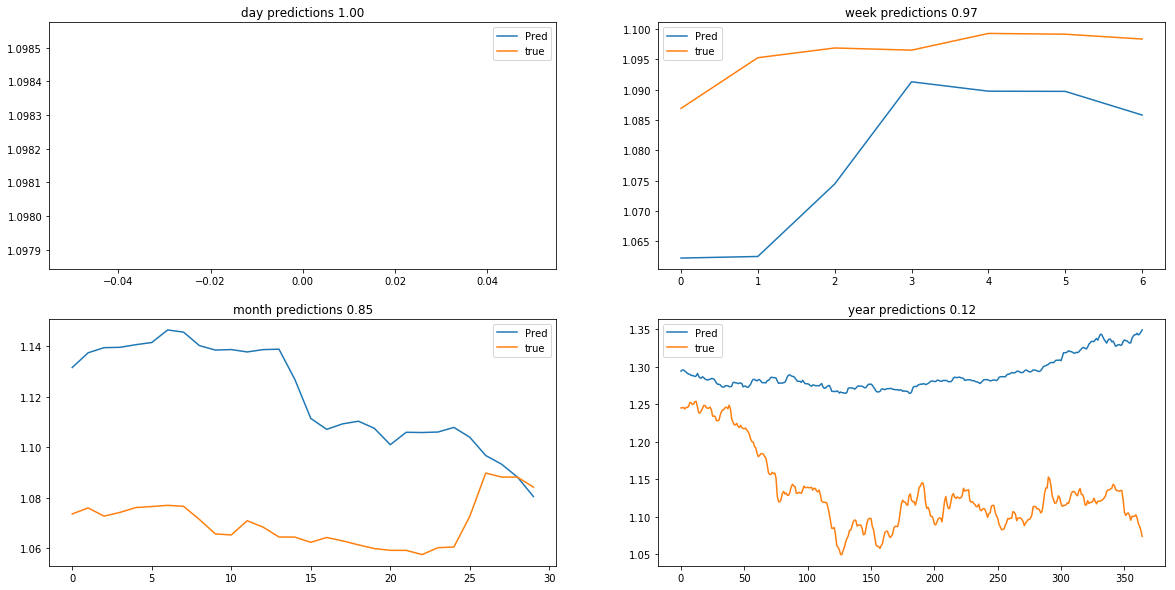

In [86]:
# feature selection
feature_set = ['Avg']
make_predictions(feature_set)

# we can see that using only one feature that is the past value itself was good, let's try some features now

confidence over a day is 0.9980185384794487
confidence over a week is 0.9695326011772503
confidence over a month is 0.8482904732334606
confidence over a year is 0.6550228114539116


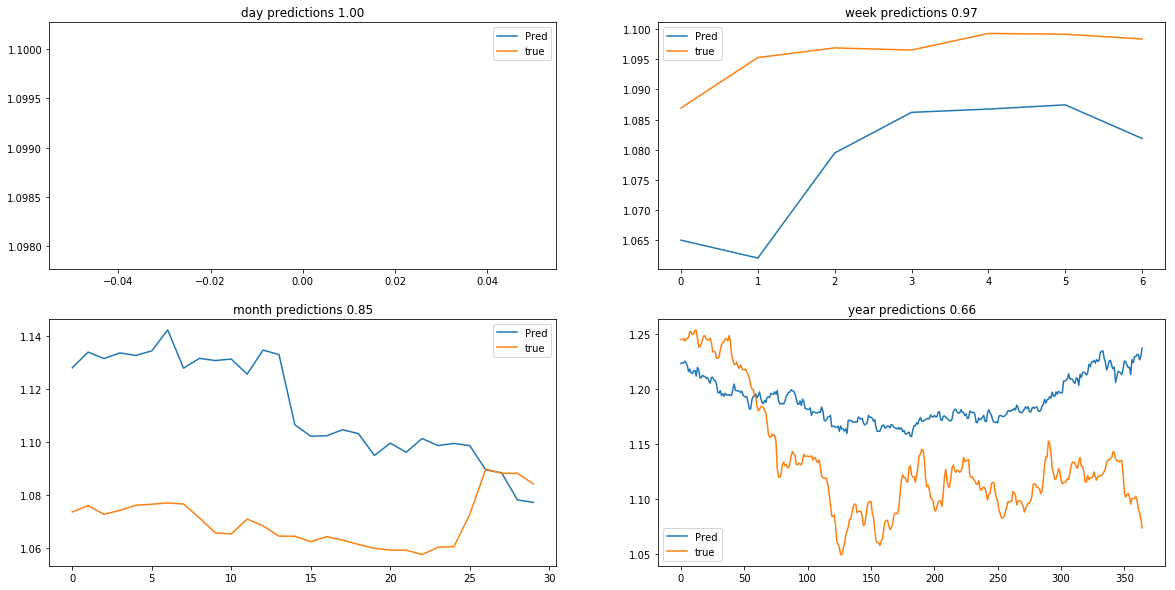

In [87]:
# feature selection
feature_set = ['High', 'Low', 'Close', 'Volume', 'Avg', 'year', 'month', 'day']
make_predictions(feature_set)

In [ ]:
# let's just neglect the values of open and close, and let's use some lagged values

confidence over a day is 0.37733490565645533
confidence over a week is 0.4052527815762489
confidence over a month is 0.34654594717741494
confidence over a year is 0.481147441739768


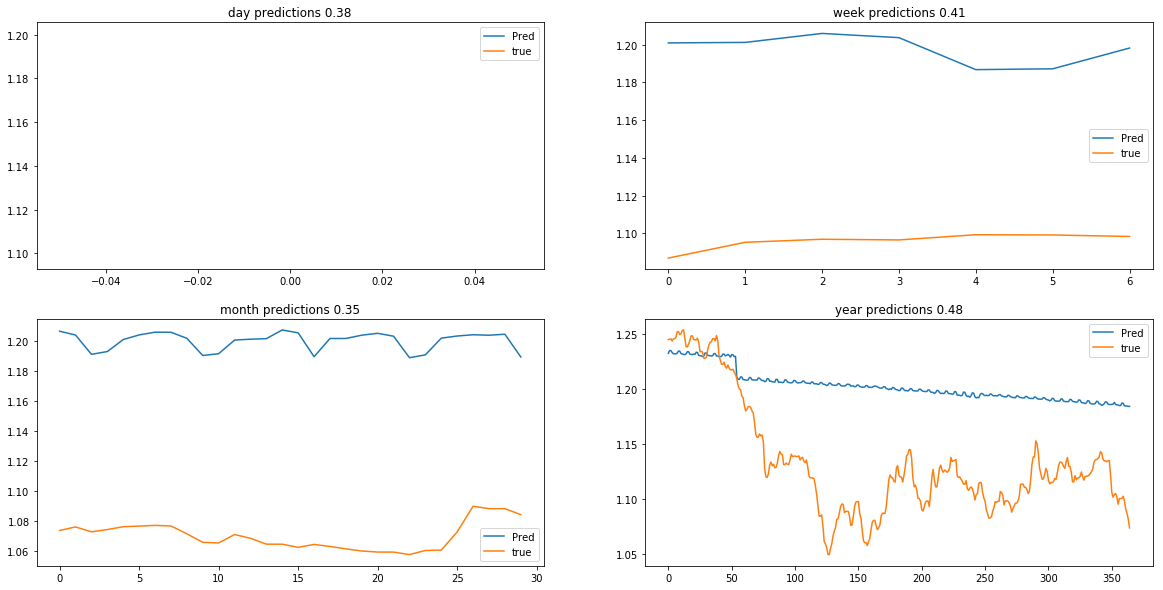

In [88]:
feature_set = [ 'year', 'month', 'day', 'Volume']
make_predictions(feature_set)

confidence over a day is 0.9983194036884621
confidence over a week is 0.9783132731382705
confidence over a month is 0.9445741599005636
confidence over a year is 0.8894164638765963


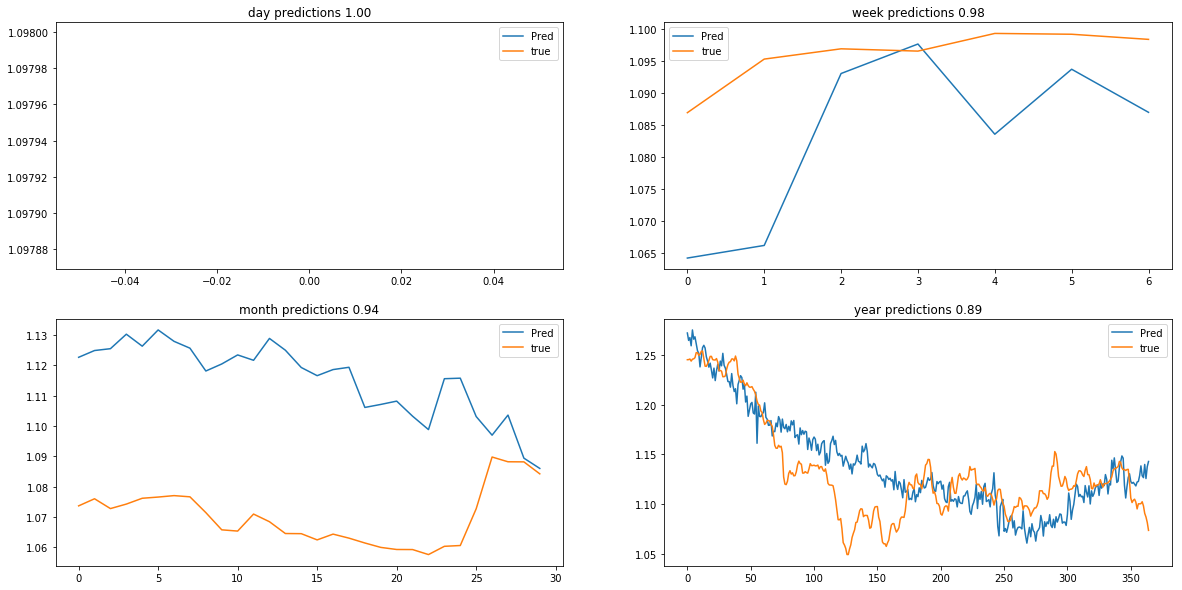

In [89]:
make_predictions(features)

## SO as we see lot's of features did really got us a better predictions